[View in Colaboratory](https://colab.research.google.com/github/noobcakes33/tensorflow/blob/master/fashion_classification.ipynb)

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
train_images , test_images = train_images / 255.0 , test_images / 255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.5046 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3726 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3369 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3107 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2946 - acc: 0.8912


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ", test_acc)

10000/10000 [==============================] - 0s 34us/step
Accuracy:  0.8772


In [0]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([3.9854069e-07, 1.3275216e-08, 1.5533376e-06, 3.4438762e-07,
       5.0744518e-07, 8.3840052e-03, 1.2084998e-06, 8.5693784e-02,
       3.7910828e-05, 9.0588027e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

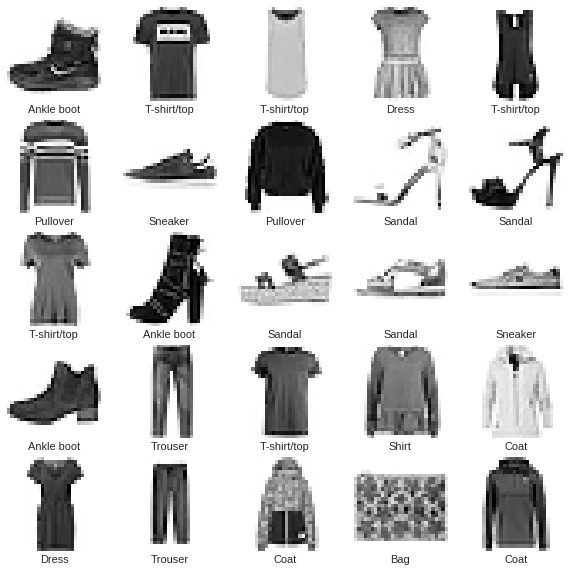

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.grid('off')
  plt.xlabel(class_names[train_labels[i]])

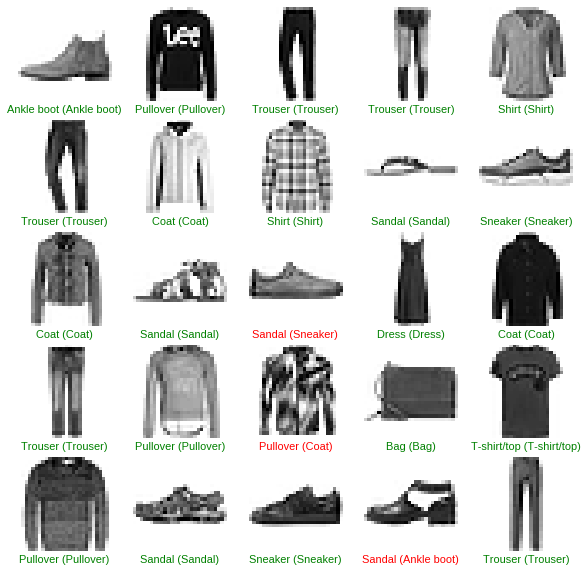

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)